IMPORTING LIBRARIES

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

IMPORTING DATASET

In [28]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

SPLITING THE DATASET INTO TRAINING SET AND TEST SET

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

FEATURE SCALING

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SVM MODEL ON TRAINING SET

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

MAKING CONFUSION MATRIX

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66  7]
 [ 6 21]]


0.87

APPLYING GRID SEARCH FOR FINDING THE BEST MODEL AND BEST PARAMTERS

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 91.98 %
Best Parameters: {'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}


VISUALISING THE TRAINING SET RESULT

/tmp/ipython-input-2255621438.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_Set[y_set == j, 0], x_Set[y_set == j, 1],


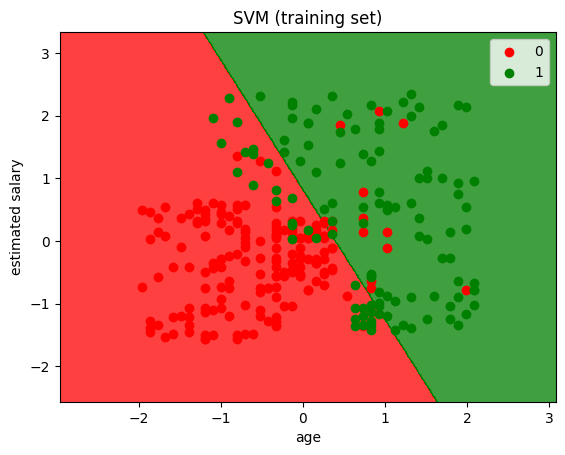

In [34]:
from matplotlib.colors import ListedColormap
x_Set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_Set[:, 0].min() - 1, stop = x_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_Set[:, 1].min() - 1, stop = x_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_Set[y_set == j, 0], x_Set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (training set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()

VISUALISING THE TESTING SET RESULT

/tmp/ipython-input-2122229355.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_Set[y_set == j, 0], x_Set[y_set == j, 1],


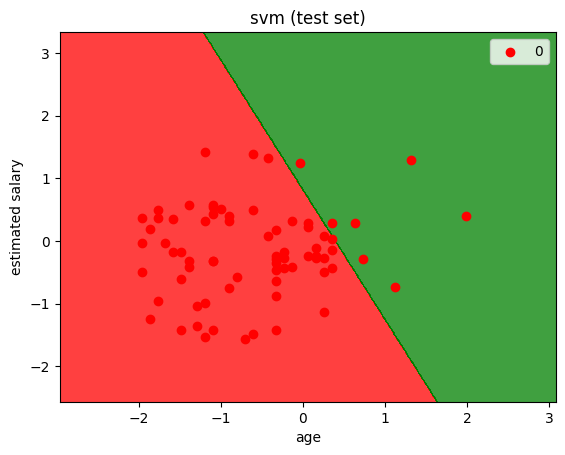

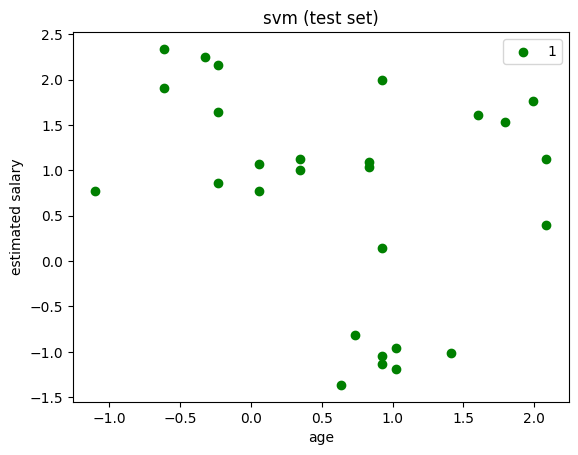

In [35]:
from matplotlib.colors import ListedColormap
x_Set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_Set[:, 0].min() - 1, stop = x_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_Set[:, 1].min() - 1, stop = x_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_Set[y_set == j, 0], x_Set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('svm (test set)')
    plt.xlabel('age')
    plt.ylabel('estimated salary')
    plt.legend()
    plt.show()

